In [36]:
#Load the dataset
import pandas as pd

df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
 #Check for Null Values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [38]:
#fill the missing value
df.dropna(subset=['director', 'cast'], inplace=True)
df['rating'].fillna('Not Rated', inplace=True)


<ipython-input-38-df01ed78ab3d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Not Rated', inplace=True)


In [39]:
#Remove the duplicates
df.drop_duplicates(inplace=True)


In [40]:
#Standardize Text
df['type'] = df['type'].str.lower().str.strip()
df['country'] = df['country'].str.strip()


In [41]:
#Fix Date Format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [42]:
#Rename Columns
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]


In [43]:
# Fix Data Types
df['release_year'] = df['release_year'].astype(int)


In [44]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Replace missing values in all columns with 'Unknown'
df = df.fillna('Unknown')



In [45]:
import pandas as pd

# Assuming 'df' is your cleaned DataFrame

# Save the DataFrame to a CSV file named 'netflix_cleaned.csv'
df.to_csv('netflix_cleaned.csv', index=False)

In [46]:
import pandas as pd

# Load the cleaned DataFrame
df = pd.read_csv('netflix_cleaned.csv')

# Check for empty strings and missing values
blank_boxes_found = df.isin(['', ' ', pd.NA, None]).any().any()

if blank_boxes_found:
    print("Blank boxes found in the cleaned DataFrame.")
    # Optional: Identify columns with blank boxes
    blank_box_columns = df.columns[df.isin(['', ' ', pd.NA, None]).any()]
    print("Columns with blank boxes:", blank_box_columns.tolist())
else:
    print("No blank boxes found in the cleaned DataFrame.")

No blank boxes found in the cleaned DataFrame.


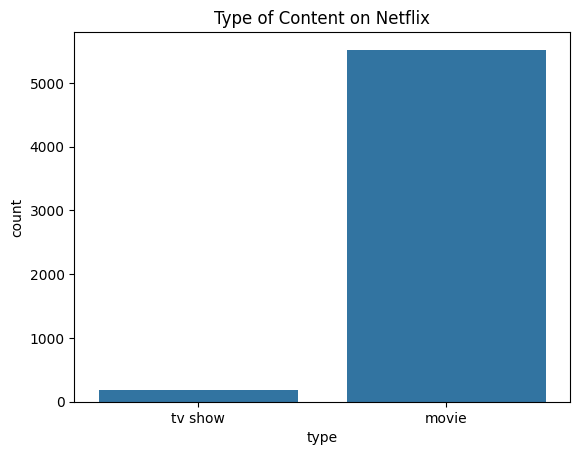

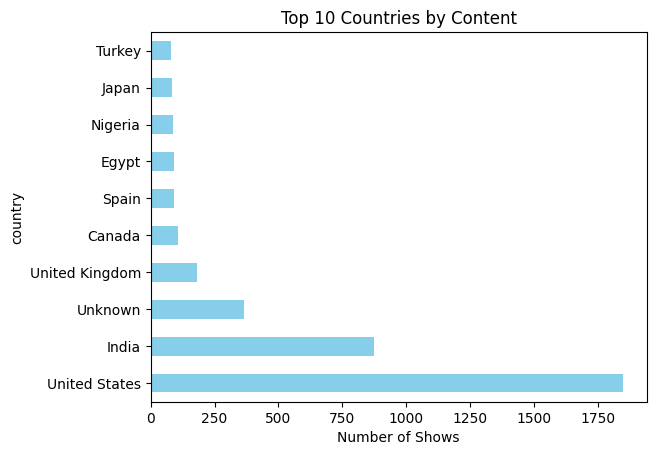

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib.pyplot as plt

# Type of content on Netflix
sns.countplot(data=df, x='type')
plt.title('Type of Content on Netflix')
plt.show()

# Top 10 countries producing Netflix content
df['country'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Shows')
plt.show()

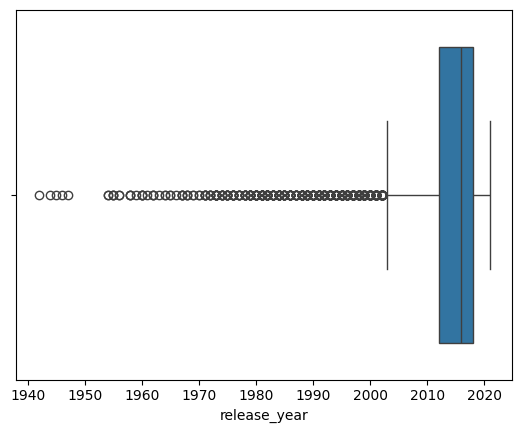

In [48]:
# Visualize to Detect Outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['release_year'])
plt.show()
